In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from deeplearning2020 import helpers
from deeplearning2020.datasets import ImageWoof

train_data, test_data, classes = ImageWoof.load_data()

C:\Users\jan\.keras\datasets\imagewoof2-320\train
Loaded 9025 images
C:\Users\jan\.keras\datasets\imagewoof2-320\val
Loaded 3929 images


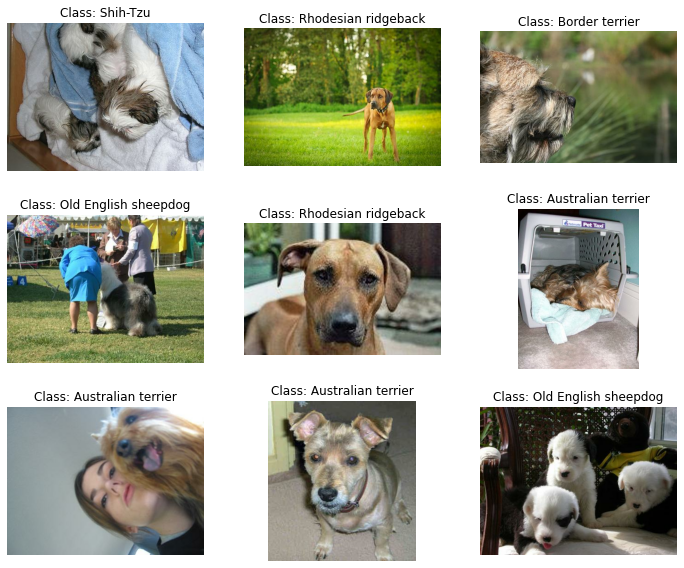

In [2]:
helpers.plot_images(train_data.take(9), classes)

In [34]:
# Größe des Trainingsdatensatzes
n_classes=len(classes)
print(classes,n_classes)



def preprocess(image, label): 
    resized_image = tf.image.resize(image, [300, 300]) 
    return resized_image, label 
helpers.plot_images(train_data.take(9), classes)

['Shih-Tzu' 'Rhodesian ridgeback' 'Beagle' 'English foxhound'
 'Border terrier' 'Australian terrier' 'Golden retriever'
 'Old English sheepdog' 'Samoyed' 'Dingo'] 10


In [4]:
train_data.take(1)

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>

In [ ]:
from tensorflow import keras
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)

In [ ]:
# Parameter des Modells
learning_rate=0.0001
momentum=0.9
dense_neurons=500
n_filters=32
first_kernel_size=(7,7)

activation='elu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=n_filters,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = 32, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(
    n_classes,
   activation="softmax"
)(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = keras.optimizers.SGD(
    lr=learning_rate,
    momentum=momentum
)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)